In [2]:
import urllib.request
import json
import pandas as pd
from pandas.io.json import json_normalize

In [3]:
def getRequestUrl(url):
    response=urllib.request.urlopen(url)
    return response.read().decode("utf-8")

In [4]:
def getMsgData(pageNum):
    url='http://apis.data.go.kr/1741000/DisasterMsg2/getDisasterMsgList?ServiceKey=#########&type=json&pageNo='
    url+=str(pageNum)
    json_str=getRequestUrl(url)
    json_object=json.loads(json_str)
    return json_normalize(json_object['DisasterMsg'][1]['row'])

In [5]:
import numpy as np
from pandas import DataFrame

In [6]:
def ItemList(d_list):
    for line in d_list['create_date']:
        all_dates.append(line[:10])

In [22]:
all_dates=[]
for i in range(1,1172):
    ItemList(getMsgData(i))
all_dates.reverse()

In [23]:
items=pd.unique(all_dates)
zero=np.zeros(((1, len(items))))
dummy=DataFrame(zero,columns=items)

In [24]:
for n in all_dates:
    for m in items:
        if n==m:
            dummy.ix[0,n]+=1  
items_matrix=dummy.T.sum(axis=1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [26]:
path_font='C:/Users/MHY/.fontconfig/NanumGothic.ttf'
fontprop=fm.FontProperties(fname=path_font,size=15)
plt.style.use('ggplot')

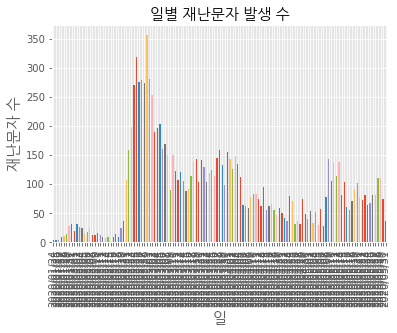

In [27]:
items_matrix.plot(kind='bar')
plt.title('일별 재난문자 발생 수', fontsize=20, fontproperties=fontprop)
plt.xlabel('일', fontsize=20, fontproperties=fontprop)
plt.ylabel('재난문자 수', fontsize=20, fontproperties=fontprop)
plt.savefig('C:/Users/MHY/Desktop/논문/chart1.png', bbox_inches='tight', dpi=300)
plt.show()

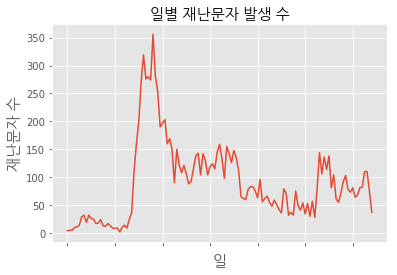

In [133]:
items_matrix.plot(kind='line')
plt.title('일별 재난문자 발생 수', fontsize=20, fontproperties=fontprop)
#plt.xticks(np.arange(10))
plt.xlabel('일', fontsize=20, fontproperties=fontprop)
plt.ylabel('재난문자 수', fontsize=20, fontproperties=fontprop)
plt.savefig('C:/Users/MHY/Desktop/논문/chart2.png', bbox_inches='tight', dpi=300)
plt.show()

In [96]:
items_matrix

2020/01/24      4.0
2020/01/25      5.0
2020/01/26      5.0
2020/01/27     10.0
2020/01/28     11.0
2020/01/29     14.0
2020/01/30     29.0
2020/01/31     32.0
2020/02/01     19.0
2020/02/02     32.0
2020/02/03     26.0
2020/02/04     25.0
2020/02/05     17.0
2020/02/06     18.0
2020/02/07     24.0
2020/02/08     13.0
2020/02/09     12.0
2020/02/10     17.0
2020/02/11     13.0
2020/02/12      9.0
2020/02/13      8.0
2020/02/14      9.0
2020/02/15      2.0
2020/02/16     10.0
2020/02/17     14.0
2020/02/18      9.0
2020/02/19     24.0
2020/02/20     36.0
2020/02/21    108.0
2020/02/22    159.0
              ...  
2020/05/02     54.0
2020/05/03     34.0
2020/05/04     53.0
2020/05/05     30.0
2020/05/06     57.0
2020/05/07     28.0
2020/05/08     78.0
2020/05/09    144.0
2020/05/10    106.0
2020/05/11    136.0
2020/05/12    114.0
2020/05/13    138.0
2020/05/14     81.0
2020/05/15    104.0
2020/05/16     61.0
2020/05/17     55.0
2020/05/18     71.0
2020/05/19     92.0
2020/05/20    103.0


C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


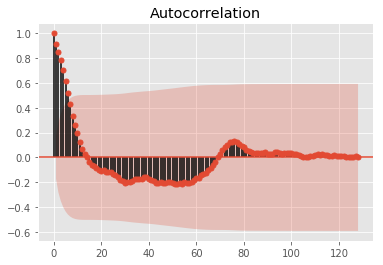

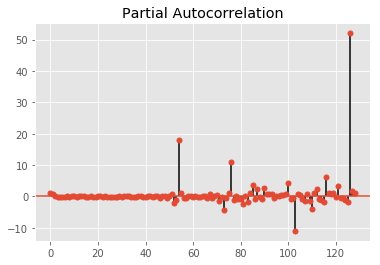

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(items_matrix)
plot_pacf(items_matrix)
plt.show()

C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


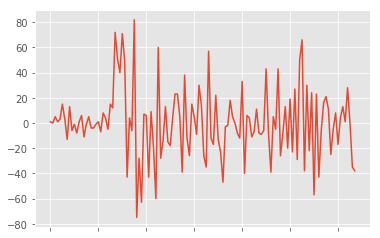

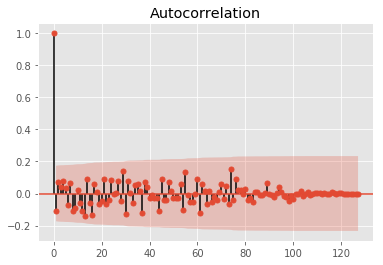

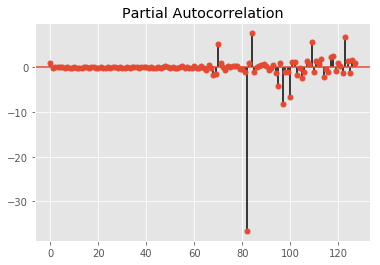

In [32]:
diff_1=items_matrix.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [126]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(items_matrix, order=(1,0,2))
model_fit=model.fit(trend='nc', full_output=True, disp=1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  129
Model:                     ARMA(1, 2)   Log Likelihood                -610.413
Method:                       css-mle   S.D. of innovations             27.178
Date:                Sun, 31 May 2020   AIC                           1228.826
Time:                        17:09:25   BIC                           1240.265
Sample:                    01-24-2020   HQIC                          1233.474
                         - 05-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9670      0.020     48.908      0.000       0.928       1.006
ma.L1.y       -0.0995      0.092     -1.078      0.283      -0.280       0.081
ma.L2.y        0.0824      0.083      0.994      0.3

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


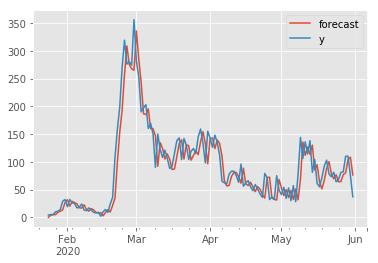

In [127]:
model_fit.plot_predict()
plt.savefig('C:/Users/MHY/Desktop/논문/(1,0,2).png', bbox_inches='tight', dpi=300)

In [128]:
fore=model_fit.forecast(steps=1)
print(fore)

(36.9543549874463, array([27.17802062]), array([[-16.31358659,  90.22229657]]))


In [132]:
items[14]

'2020/02/07'